In [ ]:
import numpy as np
import numpy.random as npr
import math as m
import matplotlib.pyplot as plt

### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [3]:
m = np.arange(12).reshape((3,4))
print('Overall Means: ',np.mean(m))
print('Rows: ',np.shape(m)[0])
print('Colums: ',np.shape(m)[1])

Overall Means:  5.5
Rows:  3
Colums:  4


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operations


In [171]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
out_prod=np.outer(u,v)
print(out_prod)

loo_prod=np.zeros((len(u),len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        loo_prod[i][j]=u[i]*v[j]
print(loo_prod)

loo_prod=np.tile(u, (len(u),1)).T
loo_prod=loo_prod*v
print(loo_prod)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [ ]:
randmat=npr.rand(10,6)
print('Old Matrix')
print(randmat)
randmat[randmat< 0.1] = 0
print('New Matrix')
print(randmat)

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.31733259 0.63466518 0.95199777 1.26933037 1.58666296
 1.90399555 2.22132814 2.53866073 2.85599332]
----------------------------------------------
[3.14159265 2.82426006 2.50692747 2.18959488 1.87226229 1.5549297
 1.23759711 0.92026451 0.60293192 0.28559933]
----------------------------------------------
[0.72986496 0.76159822 0.79333148 0.82506474]
----------------------------------------------


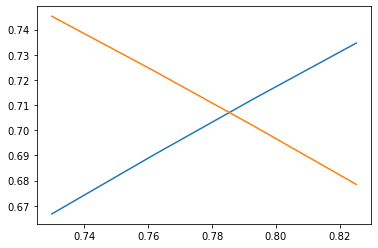

In [109]:
arr=np.linspace(0,m.pi,100)
print(arr[::10]) #take elements every 10
print('----------------------------------------------')
print(arr[::-10]) #take elements every 10 in reverse
print('----------------------------------------------')
arr_diff=arr[abs(np.sin(arr)-np.cos(arr))<0.1]
print(arr_diff)
print('----------------------------------------------')
ys = np.sin(arr_diff) 
y1s = np.cos(arr_diff) 
plt.plot(arr_diff, ys, arr_diff,y1s);

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [129]:
multmat=np.zeros((10,10))
for i in range(1,11,1):
    multmat[i-1]=i*np.arange(1,11,1)
print(multmat)

trace=np.trace(multmat)
print('The Trace is: ',trace)

antidiag=np.zeros((10))
for i in range(10):
    antidiag[i]=multmat[i][9-i]
print(antidiag)

updiag=np.zeros((9))
for i in range(9):
    updiag[i]=multmat[i][i+1]
print(updiag)

[[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
 [  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]
 [  3.   6.   9.  12.  15.  18.  21.  24.  27.  30.]
 [  4.   8.  12.  16.  20.  24.  28.  32.  36.  40.]
 [  5.  10.  15.  20.  25.  30.  35.  40.  45.  50.]
 [  6.  12.  18.  24.  30.  36.  42.  48.  54.  60.]
 [  7.  14.  21.  28.  35.  42.  49.  56.  63.  70.]
 [  8.  16.  24.  32.  40.  48.  56.  64.  72.  80.]
 [  9.  18.  27.  36.  45.  54.  63.  72.  81.  90.]
 [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]]
The Trace is:  385.0
[10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
[ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [169]:
miles=np.array([0,198,303,736,871,1175,1475,1544,1913,2448])
distmat=np.zeros((len(miles),len(miles)))
a = np.tile(miles, (len(miles),1)).T
distmat=abs(a-miles)
distmat=1.6*distmat

print(distmat)

[[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [1393.6 1076.8  908.8  216.     0.   486.4  966.4 1076.8 1667.2 2523.2]
 [1880.  1563.2 1395.2  702.4  486.4    0.   480.   590.4 1180.8 2036.8]
 [2360.  2043.2 1875.2 1182.4  966.4  480.     0.   110.4  700.8 1556.8]
 [2470.4 2153.6 1985.6 1292.8 1076.8  590.4  110.4    0.   590.4 1446.4]
 [3060.8 2744.  2576.  1883.2 1667.2 1180.8  700.8  590.4    0.   856. ]
 [3916.8 3600.  3432.  2739.2 2523.2 2036.8 1556.8 1446.4  856.     0. ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [168]:
N=100
numb=np.arange(1,N+1,1)
primes=numb
mask=np.zeros((N,),bool)
for i in range(2,round(N**0.5),1):
    mask=mask+(numb % i == 0)*(numb!=i)   
mask=np.logical_not(mask)
primes=numb[mask]

print(primes)

#N=1000000 time: 9.1645262
#N=100000  time: 0.1805370
#N=10000   time: 0.0109701
#N=1000    time: 0.0019953

[ 1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83
 89 97]


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

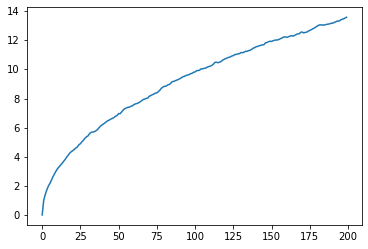

In [94]:
Nwalk=1000
Nstep=200
walkp_mat=npr.randint(0,2,(Nwalk,Nstep))
walkp_mat[walkp_mat==0]=-1

pos_mat=np.zeros((Nwalk,Nstep))
for i in range(1,Nstep):
    pos_mat[:,i]=pos_mat[:,i-1]+walkp_mat[:,i-1]

pos_mat=pos_mat**2
medpos=np.zeros(Nstep)
for i in range(Nstep):
    medpos[i]=np.mean(pos_mat[:,i])
medpos=medpos**0.5
steps=np.arange(Nstep)

plt.plot(steps, medpos);

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

['carrots', 'carrots', 'hares', 'hares', 'lynxes', 'lynxes', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots', 'hares', 'hares', 'hares', 'lynxes', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots']


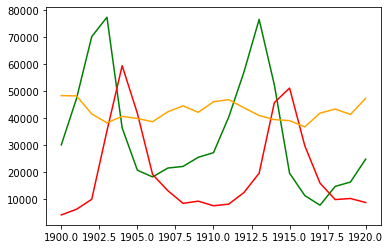

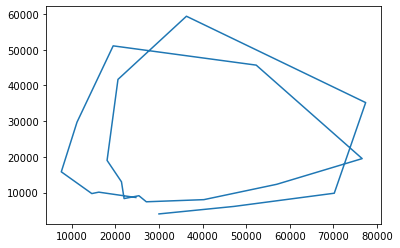

In [172]:
#import wget
#url = 'https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt'
#wget.download(url, '/Users/andre/Downloads/file.txt')

#Data
years=np.arange(1900,1921)
hares=100*np.array([300,472,702,774,363,206,181,214,220,254,271,403,570,766,523,195,112,76,146,162,247])
lynxes=100*np.array([40,61,98,352,594,417,190,130,83,91,74,80,123,195,457,511,297,158,97,101,86])
carrots=100*np.array([483,482,415,382,406,398,386,423,445,421,460,468,438,409,394,390,367,418,433,413,473])
data=np.zeros((4,len(years)))
data[0,:]=years
data[1,:]=hares
data[2,:]=lynxes
data[3,:]=carrots
#this introduction can be modified using wget
plt.figure(1)
plt.plot(years,hares,'g',year,lynxes,'r');
plt.plot(years,carrots,color='orange');

menarr=np.array([np.mean(hares),np.mean(lynxes),np.mean(carrots)])
covmat=np.cov(data[1:,:])

labels=['hares','lynxes','carrots']
maxspec=[]
for i in range(len(years)):
    ind=data[1:,i].argmax()
    maxspec.append(labels[ind])
print(maxspec)
#obviously there is some correlation here, and this plot show a clear stable dynamic equilibrium between for example 
#hares-lynxes, and this is also discussed in Lotka-Volterra Model
plt.figure(2)
plt.plot(hares,lynxes);